In [29]:
import pandas as pd
import matplotlib.pyplot as plt


# Replace this with your actual data loading
data = {
    'Date': pd.date_range('2023-01-01', periods=100, freq='D'),
    'PNL': [100, -50, 120, -80, 150, 60, -100, 50, 80, -60] * 10, # Sample PNL data
    'Stock': [1000, 1050, 1150, 1070, 1200, 1260, 1160, 1210, 1290, 1230] * 10 # Sample Stock data
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)


In [30]:
df['Equity'] = df['PNL'].cumsum()
df['Peak'] = df['Equity'].cummax()
df['Drawdown'] = df['Equity'] - df['Peak']
df

,PNL,Stock,Equity,Peak,Drawdown
Date,,,,,
2023-01-01,100,1000,100,100,0
2023-01-02,-50,1050,50,100,-50
2023-01-03,120,1150,170,170,0
2023-01-04,-80,1070,90,170,-80
2023-01-05,150,1200,240,240,0
...,...,...,...,...,...
2023-04-06,60,1260,2730,2730,0
2023-04-07,-100,1160,2630,2730,-100
2023-04-08,50,1210,2680,2730,-50


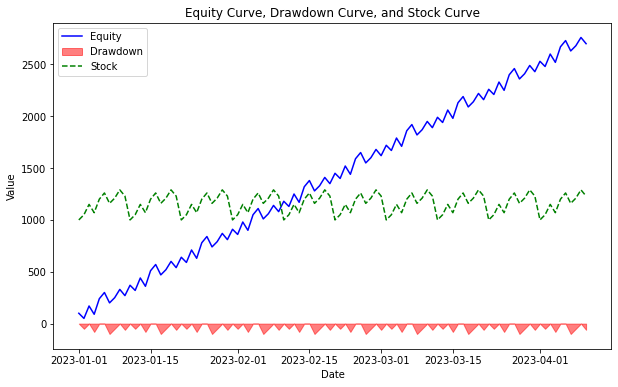

In [31]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Equity curve
ax.plot(df.index, df['Equity'], label='Equity', color='blue')

# Plot the Drawdown curve
ax.fill_between(df.index, df['Drawdown'], color='red', alpha=0.5, label='Drawdown')

# Plot the Stock curve
ax.plot(df.index, df['Stock'], label='Stock', color='green', linestyle='dashed')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Equity Curve, Drawdown Curve, and Stock Curve')
ax.legend()

# Show the plot
plt.show()
